In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/content/dataset_heart.csv")

# Recode the target variable to binary
df['heart disease'] = df['heart disease'].apply(lambda x: 1 if x == 1 else 0)

# One-hot encode categorical variables
categorical_cols = ['chest pain type', 'resting electrocardiographic results', 'ST segment', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop('heart disease', axis=1)
y = df_encoded['heart disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (216, 18)
Test shape: (54, 18)



📌 Gradient Boosting
F1 Score: 0.7797
AUC-ROC: 0.8278
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.79      0.77      0.78        30

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54


📌 SVM
F1 Score: 0.7273
AUC-ROC: 0.7917
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.80      0.67      0.73        30

    accuracy                           0.72        54
   macro avg       0.73      0.73      0.72        54
weighted avg       0.74      0.72      0.72        54


📌 Neural Network
F1 Score: 0.7368
AUC-ROC: 0.7764
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        24
           1       0.78

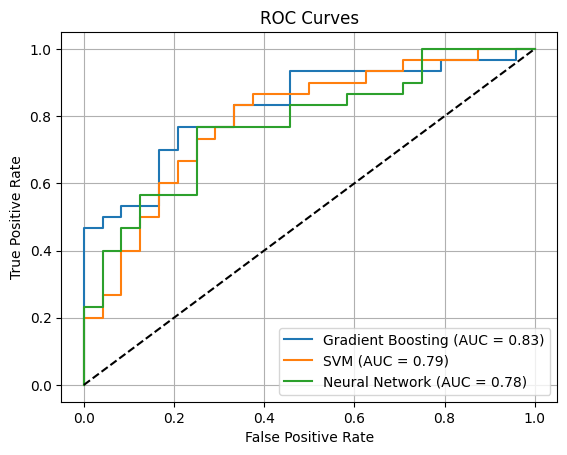

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n📌 {name}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


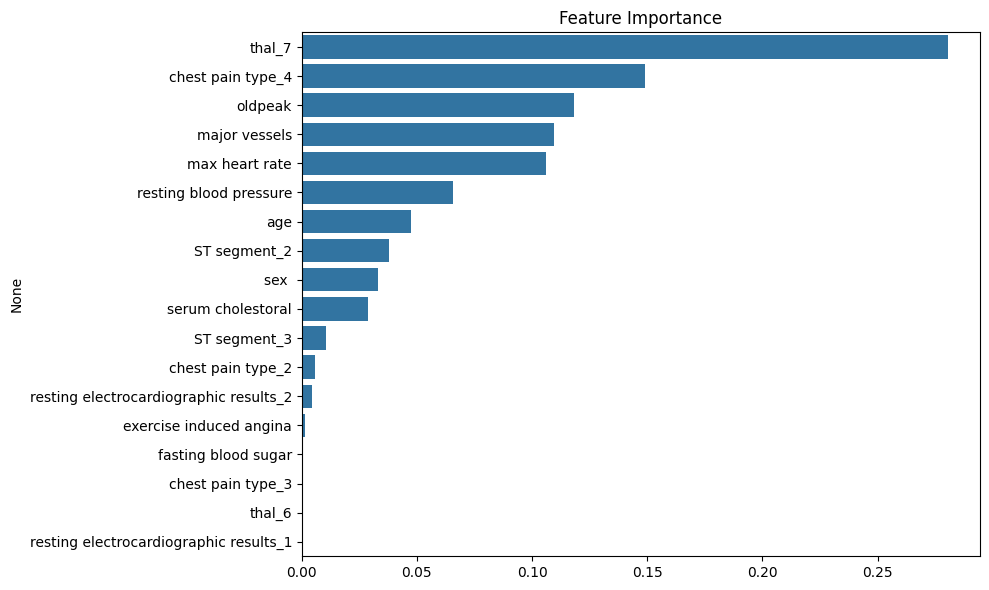

In [5]:
import numpy as np
import seaborn as sns # Import seaborn


# Use best_model if you used GridSearchCV
model = best_model
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot top features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=importances[indices], y=features[indices])
plt.tight_layout()
plt.show()


<ipython-input-6-c2b860580d7d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='Spectral')


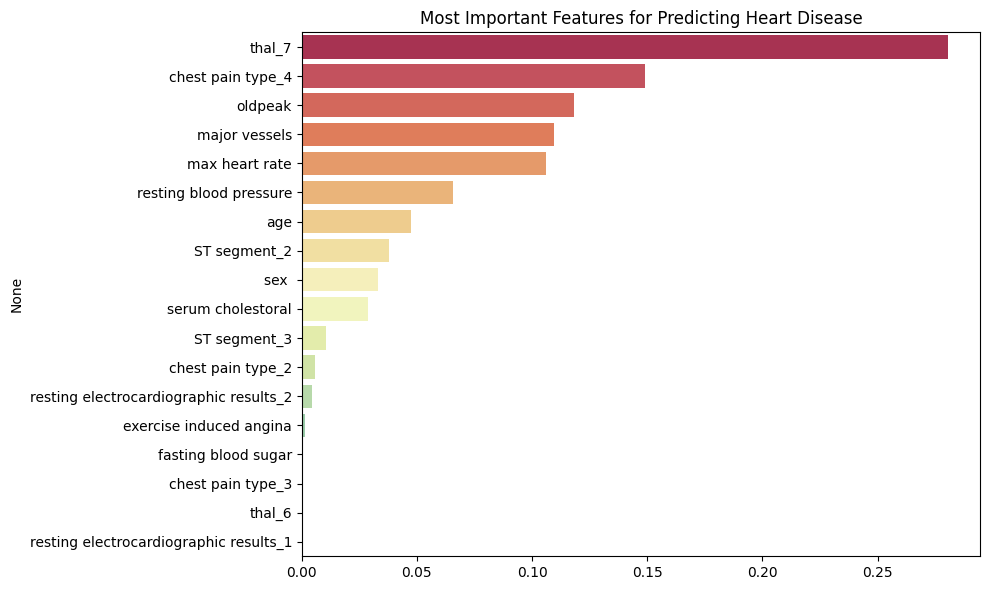

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume `model` is the best-performing Gradient Boosting model
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='Spectral')
plt.title("Most Important Features for Predicting Heart Disease")
plt.tight_layout()
plt.show()
